# Section 3


In [1]:
# ensure src is in path
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import scipy.stats
import pylab

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()

Statsmodels imports


In [4]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.graphics.tsaplots as sgt

# old version
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

[3.14 Loading the Data -
Udemy](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275478#overview)


In [5]:
raw_csv_data = pd.read_csv("../data/Index2018.csv")

In [6]:
# Preserve a copy of the unaltered DataFrame
df_comp = raw_csv_data.copy()

## Initial explorations


- [3.15 Examining the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275480#overview)


In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Note that the average price for the S&P is quite lower. The maximum value of the S&P is lower than the minimum value of the FTSE and Nikkei.

This difference in magnitude will need to be taken into account when making comparisons.

Values for the Dax and FTSE are similar.
S&P is smaller, Nikkei is larger.


In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Check for missing values


In [9]:
# remember: isna() returns a boolean series
# use sum to get total na per column
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data


- [3.16 Plotting the
  Data](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275482#overview)


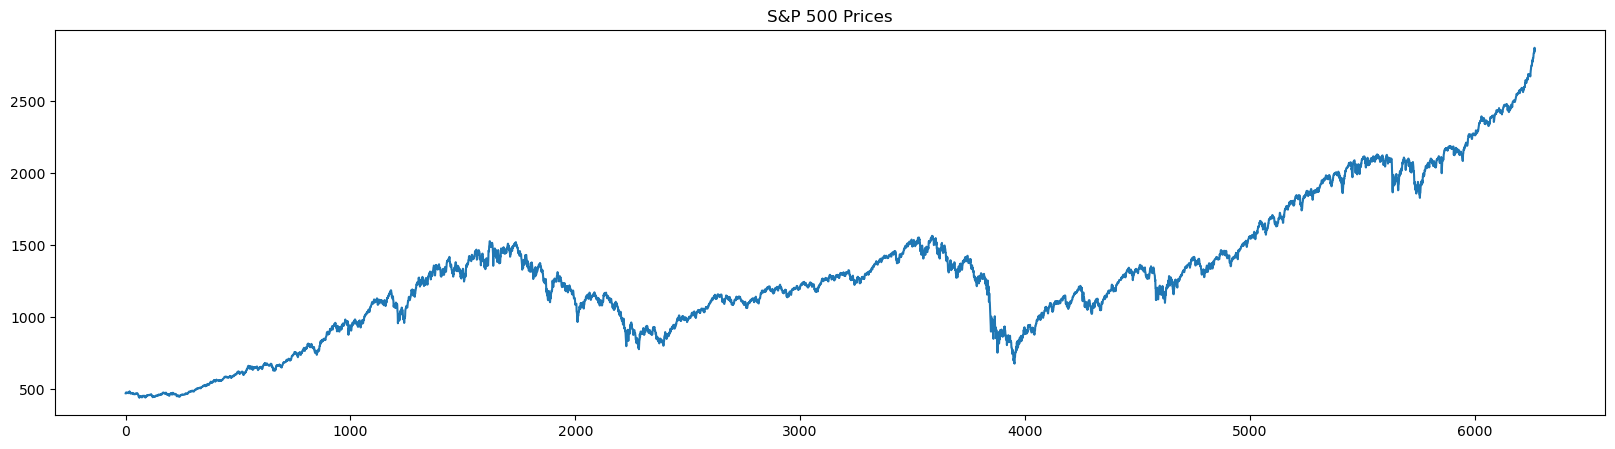

In [10]:
# S&P 500
df_comp.spx.plot(
    figsize=(20, 5),
    title="S&P 500 Prices"
)
plt.show()

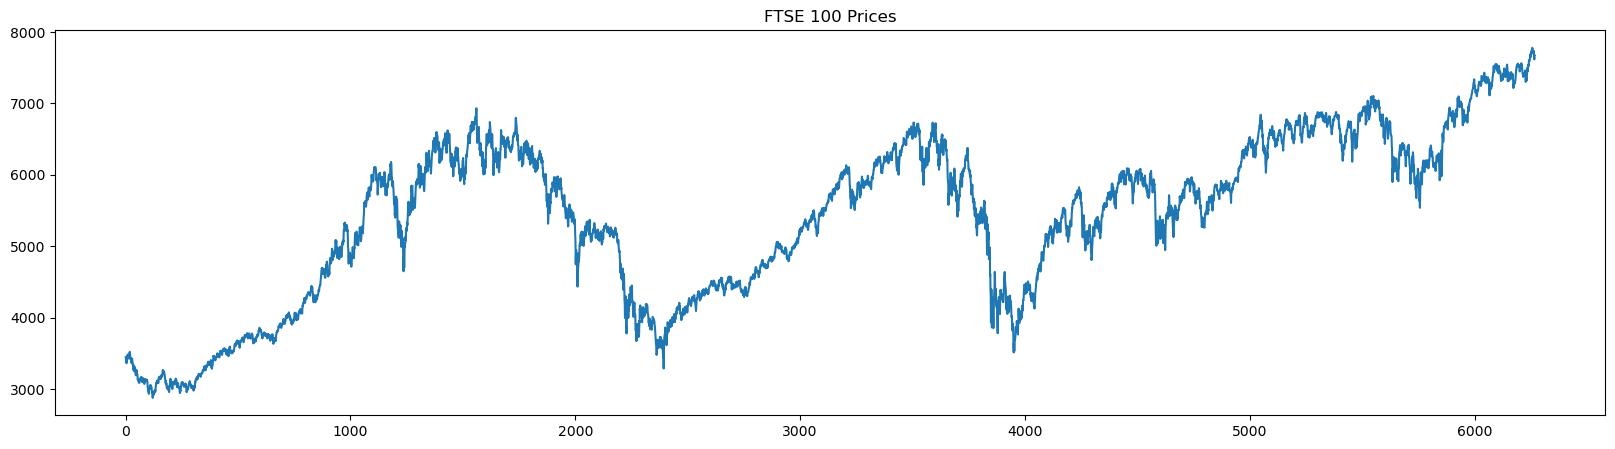

In [11]:
# FTSE 100
df_comp.ftse.plot(
    figsize=(20, 5),
    title="FTSE 100 Prices"
)
plt.show()

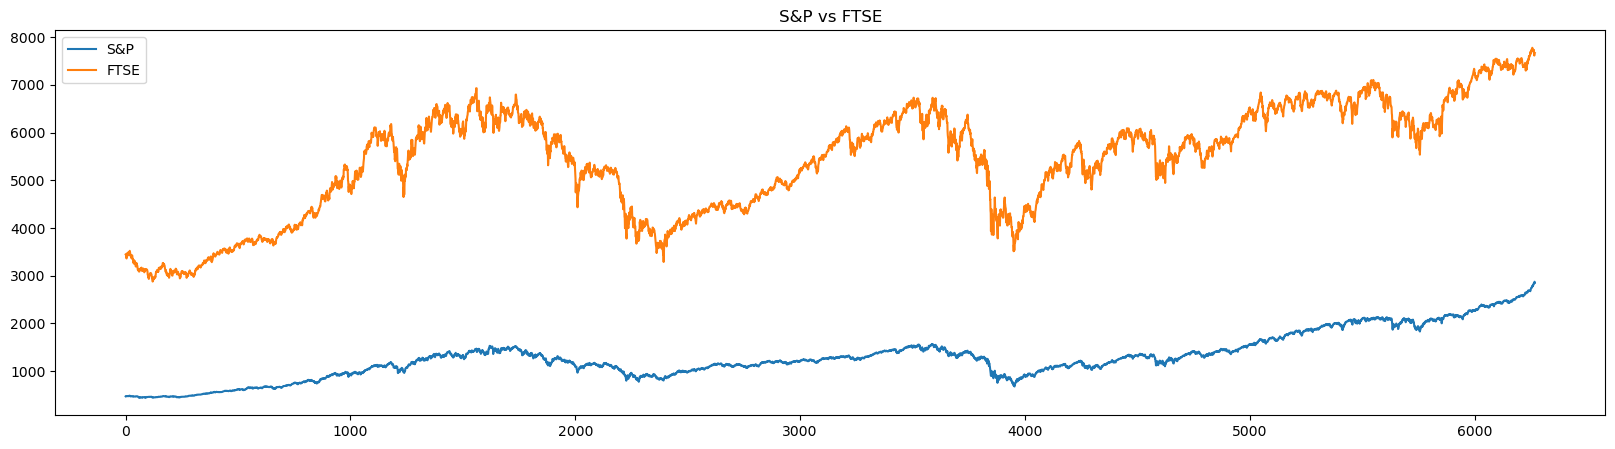

In [12]:
# S&P 500 vs FTSE 100

df_comp["spx"].plot(
    figsize=(20, 5),
    title="S&P500 Prices",
    label='S&P')

df_comp["ftse"].plot(
    figsize=(20, 5),
    title="FTSE 100 Prices",
    label="FTSE")

plt.title("S&P vs FTSE")

plt.legend()
plt.show()

- [3.17 QQ Plot](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275490#overview)


Helps determine if distribution fits specific distribution (normal by
default).

Reminders:

- x-axis: how many standard deviations from the mean these values are.
- red line: What the data points should follow if the points are normally
  distributed

This data is not normally distributed (note the values clustering around 500)


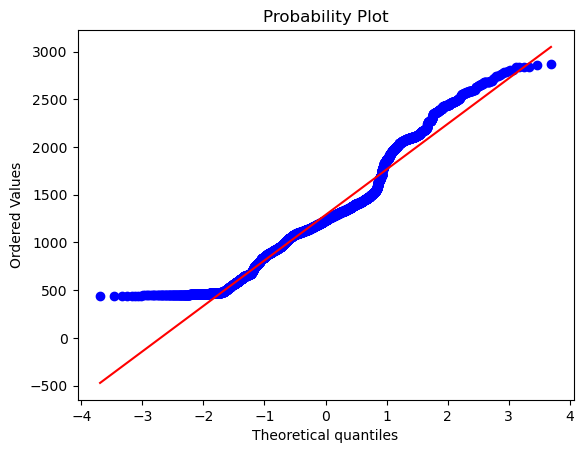

In [13]:
scipy.stats.probplot(
    df_comp["spx"],
    plot=pylab
)

pylab.show()

## Convert to time series, split data for training and testing


- [3.18 Transforming string imports to DateTime
  values](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275494#overview)


Length of date colum.

- call `describe` method
- If column is text ,`top` is completely arbitrary
  - all non-empty `string` values are considered `1`, so this ends up being arbitrary

The `pd.to_datetime` method assumes the date is a `str` in "mm/dd/yyy" form.

The data in this table is saved as "dd/mm/yy" format.


In [14]:
df_comp['date'].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [15]:
df_comp["date"] = pd.to_datetime(
    df_comp["date"],
    dayfirst=True)

In [16]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
# old pandas version
# df_comp["date"].describe(
#     datetime_is_numeric=True)

df_comp["date"].describe(
    include="all")

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [20]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.19 Using Date as an
  Index](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275496#overview)

Set `date` column to index.

Remember: once the `date` column is an index, it cannot be treated as a
column.


In [21]:
df_comp.set_index(
    "date",
    inplace=True)

In [22]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


- [3.20 Setting the
  Frequency](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275498#overview)

`.as_freq()` method.

- 'h' - hourly
- 'w' - weekly
- 'd' - daily
- 'm' - monthly
- 'a' - annual (yearly)
- 'b' - business days only

If values don't exist for generated date, the columns will be populated
with `NaN` values.


In [23]:
# daily will add all days, including weekends.
df_comp = df_comp.asfreq('d')

# note the NaN values for 01-08 and 01-09
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


Financial data is not recorded on weekends or holidays.

The dates `1994-01-08` and `1994-01-09` are Saturday and Sunday.


In [24]:
# only use business days
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


- [missing
  values](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275502#overview)

Setting the frequency to business day added 8 `NaN` values across the
dataset.

Use `fillna()` method:

- `method='ffill'`: front filling assigns the value of the previous period
- `method='bfill'`: assign the value for the next period
- assign the next value (sometimes the mean)

Assigning the mean is not a good approach with time series data.

Try out different approaches.


In [25]:
# note that each column is missing 8 values
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
# spx: front fill
df_comp['spx'].fillna(method='ffill', inplace=True)

# ftse: backfill
df_comp['ftse'].fillna(method='bfill', inplace=True)

# dax: assign mean
# this is usually a poor approach
# only appropriate if if closely fluctuates around the mean
# throughout the period
df_comp['dax'].fillna(
    value=df_comp['dax'].mean(),
    inplace=True)

In [27]:
df_comp['nikkei'].fillna(
    method='ffill',
    inplace=True)

df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Getting rid of supplementary data

- adding and removing columns


In [28]:
# make a new column that duplicates spx
df_comp['market_value'] = df_comp['spx']

In [29]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.672753,1288.642547
std,487.868210,2752.604984,1145.568370,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [30]:
# removing columns

del df_comp['dax'], df_comp['ftse'], df_comp['nikkei'], df_comp['spx']

In [31]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Train Test Split

You can't really shuffle time series data as you do for other machine learning methods.

Training and testing must be uninterrupted series of data.

- Training set: the entire time series up to some cutoff.
- Testing: the rest after the cutoff.

The size of the training data is up for debate

- Too large and it will over-fit
- Too small: will not be accurate enough

For the purposes of this exercise, we'll use an 80-20 split.


In [32]:
# find cutoff point.
total_size = len(df_comp['market_value'])  # 6277 observations

training_percent = 0.8

# get number of training observations at 80% split
size = int(total_size * training_percent)  # 5021

In [33]:
# Training
df = df_comp.iloc[:size]

# Testing
df_test = df_comp.iloc[size:]

## Appendix Updating the Dataset

- [Appendix](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16390632#overview)


## White Noise

- [White Noise](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275516#overview)

White noise has a constant mean, a constant variance, and no autocorrelation.

no autocorrelation = no clear relationship between past and present values.

A sequence of random data where every value has a time period associated with it.

It's important to be able to distinguish white noise vs. time series data.


In [34]:
wn = np.random.normal(
    loc=df['market_value'].mean(),
    scale=df['market_value'].std(),
    size=len(df))

In [35]:
df['wn'] = wn

/var/folders/sj/bg11nws174149tz7cglv95b40000gn/T/ipykernel_61276/672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [36]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1084.857937
std,292.559287,294.762191
min,438.920000,186.916821
25%,914.620000,889.260870
50%,1144.650000,1083.108962
75%,1316.280729,1282.257424
max,1570.252238,2197.125815


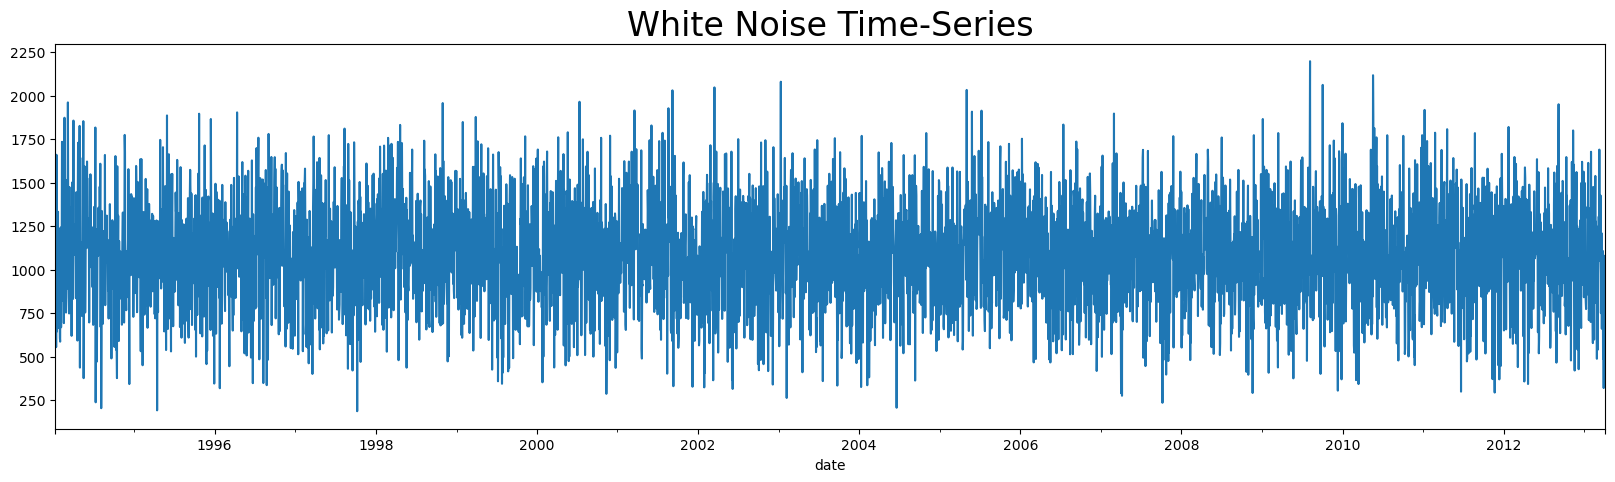

In [37]:
df['wn'].plot(figsize=(20, 5))
plt.title('White Noise Time-Series', size=24)
plt.show()

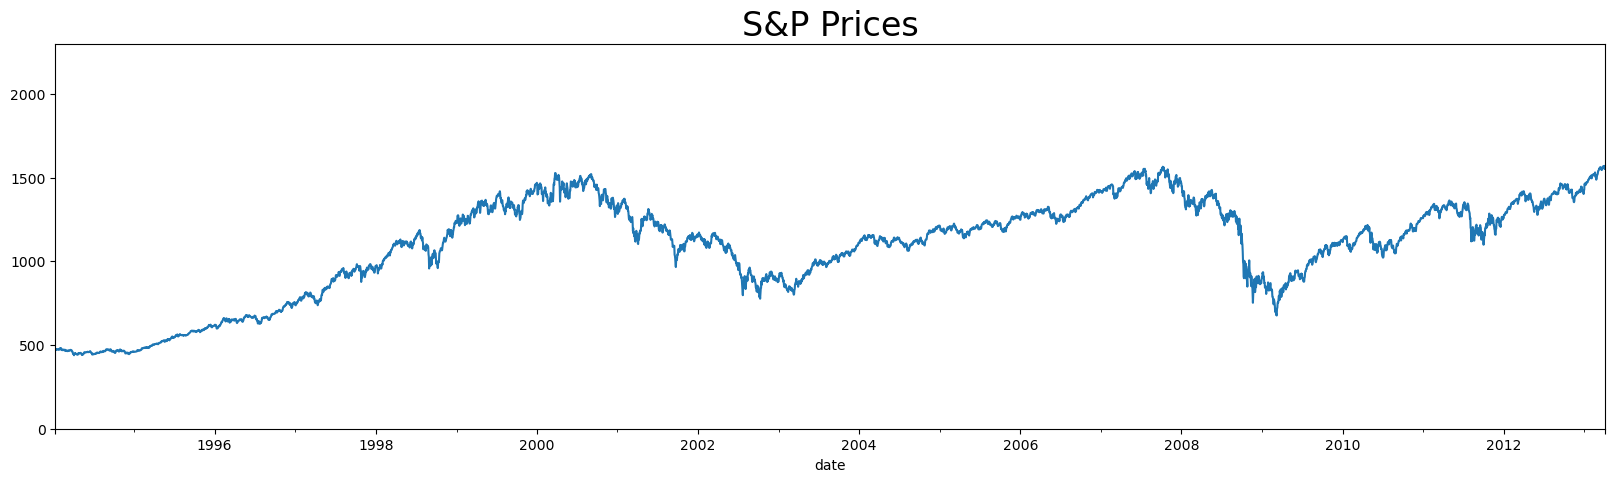

In [38]:
df['market_value'].plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0, 2300)
plt.show()

## Random walk

- [Random walk](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275518#overview)


In [39]:
!ls ../data/RandomWalk.csv

ls: ../data/RandomWalk.csv: No such file or directory


In [42]:
rw_path = "../data/RandWalk.csv"
rw = pd.read_csv(rw_path)

In [43]:
rw['date'] = pd.to_datetime(rw['date'], dayfirst=True)

In [44]:
rw.set_index("date", inplace=True)

In [45]:
rw = rw.asfreq('b')

In [46]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [47]:
type(rw)

pandas.core.frame.DataFrame

In [48]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [49]:
df.loc[:, 'rw'] = rw['price']

/var/folders/sj/bg11nws174149tz7cglv95b40000gn/T/ipykernel_61276/4188681249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rw'] = rw['price']


In [50]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,790.561191,1122.139662
1994-01-10,475.27,902.612715,1080.347860
1994-01-11,474.13,1245.381481,1082.095245
1994-01-12,474.17,554.983677,1083.639265
1994-01-13,472.47,1659.817596,1067.146255


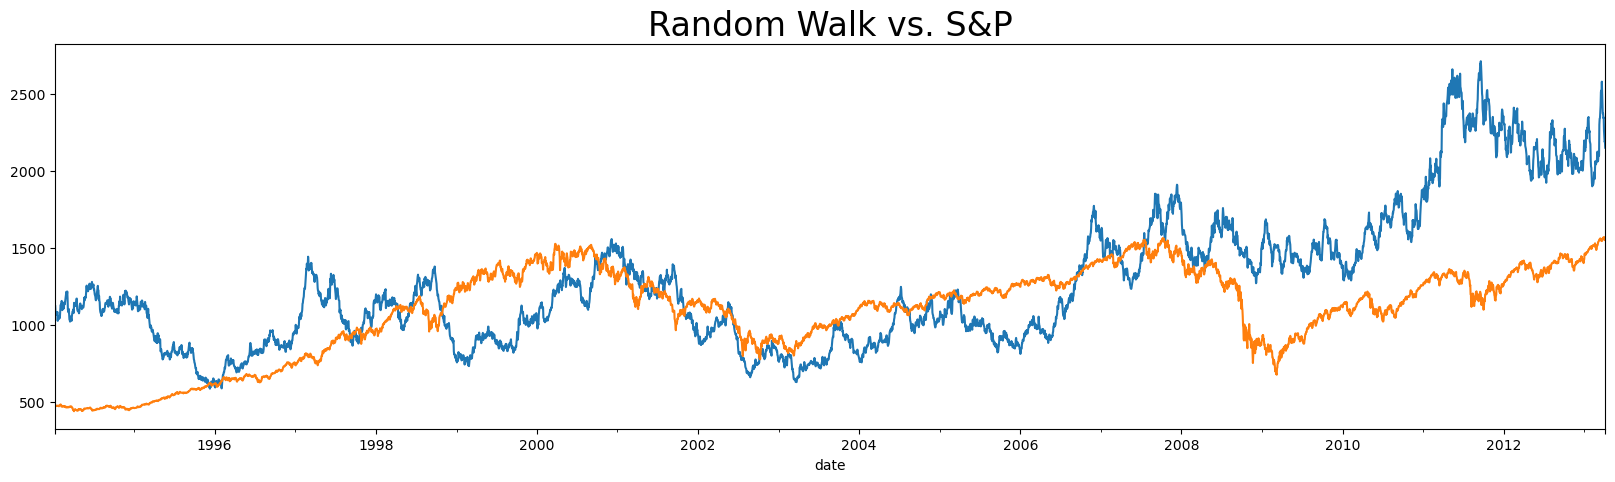

In [51]:
df['rw'].plot(figsize=(20, 5))
df['market_value'].plot()
plt.title("Random Walk vs. S&P", size=24)
plt.show()

Both have:

- small variations between consecutive time periods
- cyclical increases and decreases in short periods of time


Market Efficiency

Measures the level of difficulty in forecasting correct future values

- If the time series resembles a random walk, the prices cannot be predicted with great accuracy.
- If the prices can be predicted with reasonable accuracy, there are arbitrage opportunities.

Arbitrage: Buy and sell commodities and make a safe profit while the price adjusts.

In theory, investors take advantage when these opportunities exist and eventually the prices adjust to the expected value.


## Stationarity

- [stationarity](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275520#announcements)

time series consecutive samples of data should equal covariances

weak form stationarity
covariance stationarity

three assumptions:

- Constant mean
- variance
- consistent covariance between intervals

ie:

$$
Cov(x_1, x_4) = Cov(x_3, x_6)
$$

since they are both 3 intervals apart.

White noise is an example

- mean $\mu$ = 0
- variance $\sigma^2$ is constant
- autocorrelation between lags is always zero

$$
Cov(x_n, x_{n + k}) =
Corr(x_m, x_{m + k})\sigma_1 \sigma_2 = 0
$$


## Determining Weak Form Stationarity in Time Series

- [video](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275526#announcements)

Dickey-Fuller (DF) test

- $H_0: \phi_1 < 1$

- $H_1: \phi_1 = 1$

if the test statistic < critical value, we reject the null hypothesis and decide the data comes from a stationary process.


In [52]:
# import statsmodels.tsa.stattools as sts

# augmented dicky-fuller test
sts.adfuller(
    df['market_value']
)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

outputs

```python
(-1.7369847452352454,  # ADF test statistic: can be compared to critical values
 0.4121645696770613,  # p-value associated with test statistic 41.2% of not rejecting null
 18, # lags used in the regression to determine t-statistic. some autocorrelation going back 18 periods
 5002, # number of observations used in the analysis. this value depends on lags used in regression (two should add up to size of dataset)
 {'1%': -3.431658008603046, # critical values from tables
  '5%': -2.862117998412982, # critical values
  '10%': -2.567077669247375}, # critical values
 39904.880607487445)  # maximized information criteria. some apparent autocorrelation. the lower the value, the easier it is to make predictions for the future


```

T statistic is greater than critical value
no sufficient evidence of stationarity


In [53]:
# try on white noise: completely stationary
# no autocorrelation
sts.adfuller(df['wn'])

# t-value under significance levels

(-71.80971208222954,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70871.84656810189)

In [54]:
# random walk
# cannot be identified as stationary (fail to reject null)
# more than 60% chance comes from a non-stationary process

sts.adfuller(df['rw'])

# random walk intervals of the same size often differ significantly
# chance dictates that intervals can be up or down and the covariances
# would rarely be equal. non-stationary process

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

p-value of 0.04: stationary assuming 5% significance


## Seasonality

- [seasonality](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275532#announcements)

patterns recur in cyclic basis

- trend -> pattern
- seasonal -> cyclical effects
- residuals -> error of prediction


"Naive" decomposition

expect a linear relationship between the three parts and the

Additive:

observed = trend + seasonal + residual

Multiplicative

observed = trend x seasonal x residual


In [55]:
# seasonal decompose
# from statsmodels.tsa.seasonal import seasonal_decompose

# store output in a variable
s_dec_additive = seasonal_decompose(
    df['market_value'],
    model='additive')

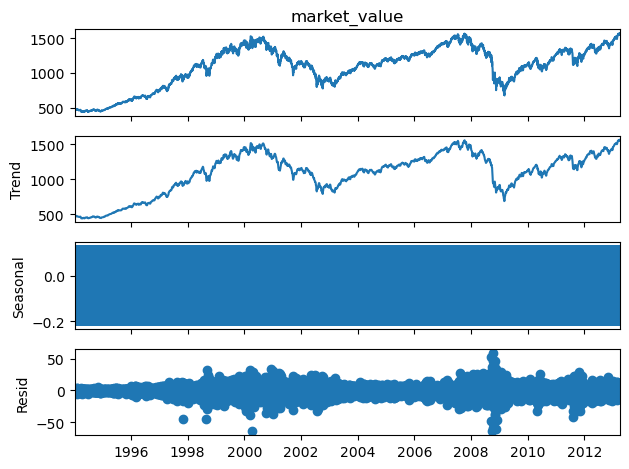

In [56]:
s_dec_additive.plot()
plt.show()

- notice observed and trend look very similar.
- seasonal plot looks like a rectangle: oscillating back and forth and plot is likely too small.
- no cyclical pattern found using naive additive decomposition


In [57]:
# store output in a variable
s_dec_multiplicative = seasonal_decompose(
    df['market_value'],
    model='multiplicative')

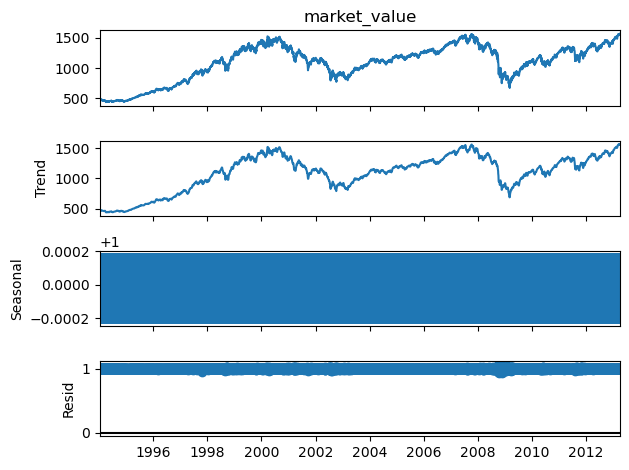

In [58]:
s_dec_multiplicative.plot()
plt.show()

- looks similar to additive
- trend looks like observed values
- seasonal sequence has no clear pattern again

indicates no seasonality among s&p prices
trend follows actual data closely


## Correlation between past and present values

- [video](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275536#announcements)

no shuffling: preserve chronological order

often discover links between past and present values in time series data
some relationships between $t$ and $t-1$

Greek letter `rho`: think relationship (even though it looks like a
$\rho$)

Correlation: $\rho(x, y)$

- measures the similarity in the change of values of two series

in this case we only have a single variable

Autocorrelation:

- correlation between sequence and itself
- resemblance between a lagged sequence
- how much of yesterday's values (yearly, etc) are represented in today's
  value


## ACF: Autocorrelation Function

- [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)
- [video](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275540#announcements)

* computes autocorrelations for multiple lags
* shows the relationship between past values and the current one


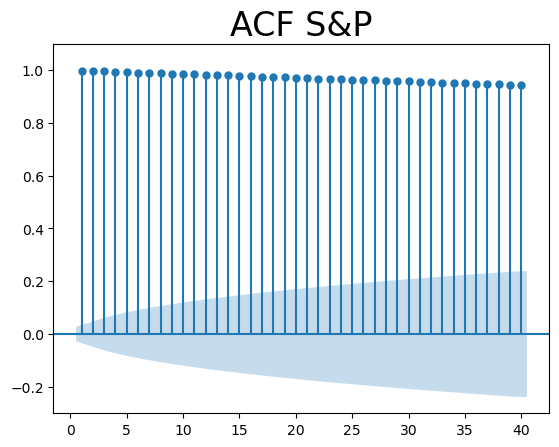

In [59]:
# import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(
    df['market_value'],
    lags=40,  # number of lags, default is length of time-series last 40 periods before current
    # don't include current values in graph (no need to compare self to self)
    zero=False,
)


plt.title("ACF S&P", size=24)
plt.ylim(-0.3, 1.1)
plt.show()

y axis: possible values of autocorrelation coefficient  
x axis: lag values

tall line: autocorrelation for x periods ago  
blue area around x-axis represent significance

suggests possibility of autocorrelation for that specific lag  
in this case: the greater the distance in time, the more unlikely it is
that this autocorrelation persists

all blue marks greater than the blue area around x-axis
and indicator of time dependence in the data

we can see that autocorrelation barely diminishes

prices even a month back can still serve as decent estimators


ACF of white noise


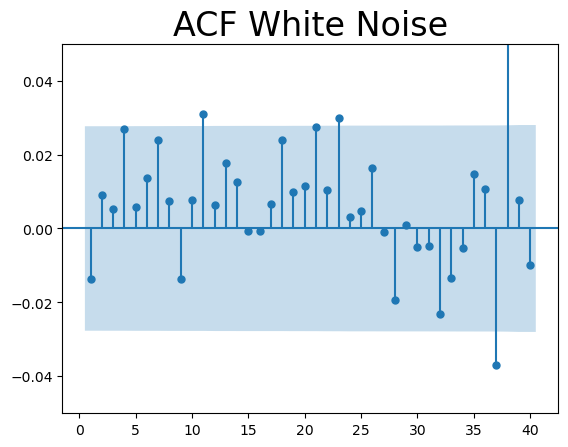

In [60]:
# import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(
    df['wn'],
    lags=40,  # number of lags, default is length of time-series last 40 periods before current
    # don't include current values in graph (no need to compare self to self)
    zero=False,
)
plt.title("ACF White Noise", size=24)
plt.ylim(-0.05, 0.05)
plt.show()

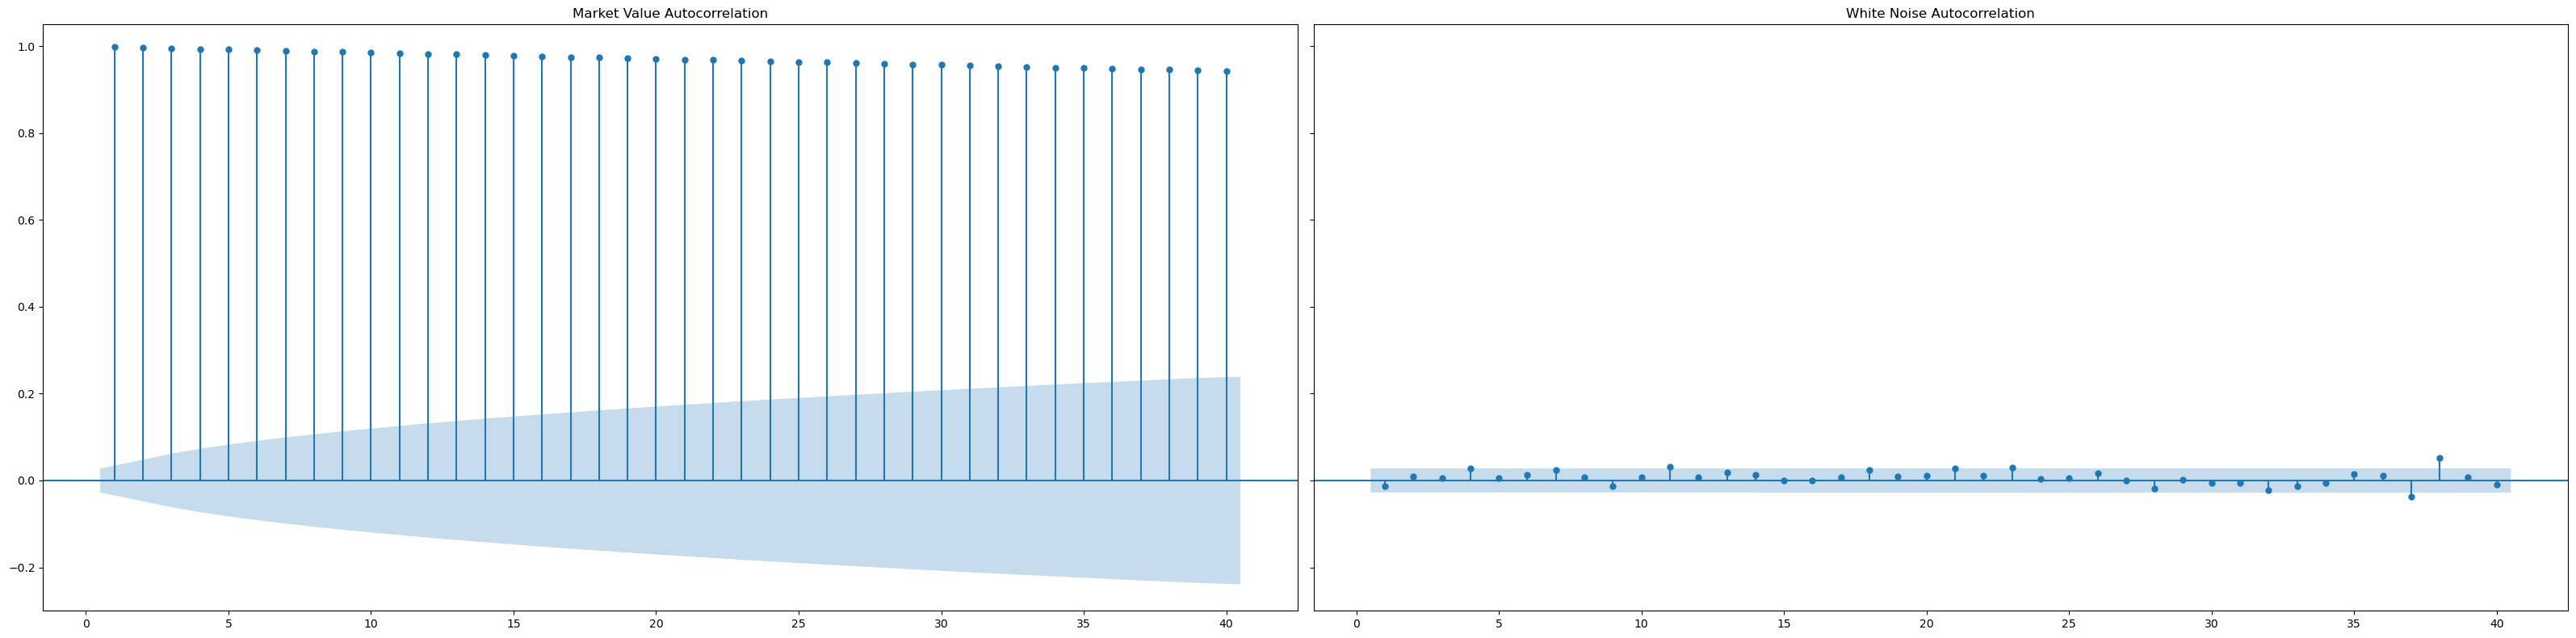

In [61]:
fig, axs = plt.subplots(
    1, 2,
    figsize=(32, 8),
    sharey=True)

sgt.plot_acf(
    df['market_value'],
    lags=40,  # number of lags, default is length of time-series last 40 periods before current
    # don't include current values in graph (no need to compare self to self)
    zero=False,
    ax=axs[0],
    title="Market Value Autocorrelation"
)

sgt.plot_acf(
    df['wn'],
    lags=40,  # number of lags, default is length of time-series last 40 periods before current
    # don't include current values in graph (no need to compare self to self)
    zero=False,
    ax=axs[1],
    title="White Noise Autocorrelation"
)

plt.ylim(-0.3, 1.05)
plt.tight_layout()
plt.show()

White noise debrief:

- values go up and down: patterns of positive and negative autocorrelation
  - very different from s&p (all values positive)
- all lines fall within blue area
  - suggest no autocorrelations for any lag, one of the assumptions of white noise data


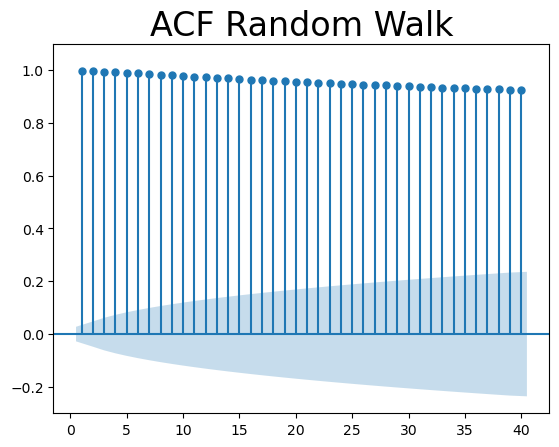

In [62]:
# import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(
    df['rw'],
    lags=40,  # number of lags, default is length of time-series last 40 periods before current
    # don't include current values in graph (no need to compare self to self)
    zero=False,
)


plt.title("ACF Random Walk", size=24)
plt.ylim(-0.3, 1.1)
plt.show()

## PACF: Partial Autocorrelation Function

- [Video](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275544#announcements)
- [statsmodels.graphics.tsaplots.plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html)


Coefficients also capture secondhand effects.

Direct and indirect

- ways lagged series affect current data
- secondhand effects: prices 3 days ago affecting value 2 or 1 day ago,
  which in turn affect today's price

If you want only how the price 3 days ago affects today's price (without
day 2 or 1), you calculate the partial autocorrelation.

partial autocorrelation function: pacf

for this function, you do pick a method. check the documentation for
different options.


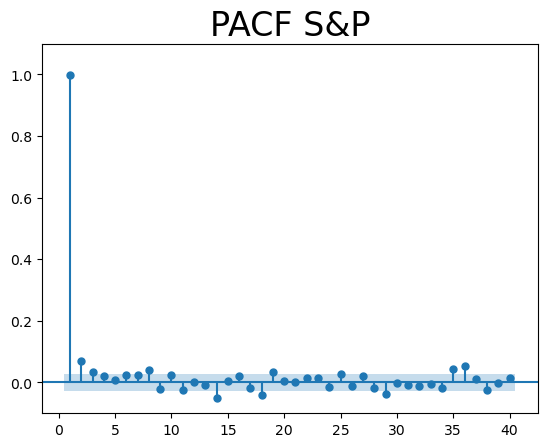

In [63]:
# pacf for s&p
# import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(
    df['market_value'],  # times series to be examined
    lags=40,  # standard optimal number of lags
    zero=False,  # don't include today vs today
    method=('ols')  # ordinary of least squares

)

plt.title("PACF S&P", size=24)
plt.ylim(-0.1, 1.1)
plt.show()

Only the first several elements are significantly different from zero.

Some of the values (like the 9th lag) are negative

- values 9 days ago resulted in lower values today and vice-versa
- cancels out all additional channels a previous period value affects the present one

PACF: $x_{t-2} \rightarrow x_t$

Cancel out: $x_{t-2} \rightarrow x_{t-1} \rightarrow x_t$


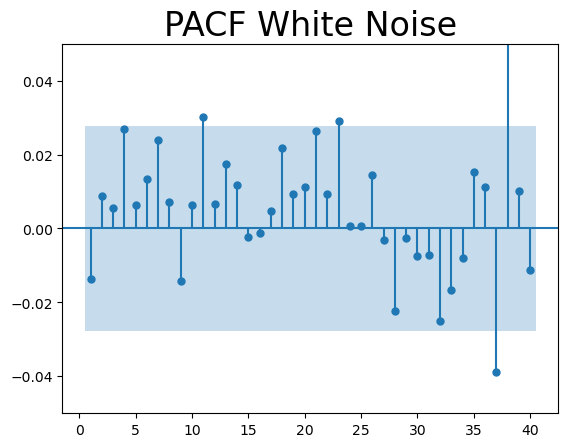

In [64]:
# pacf for white noise
# import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(
    df['wn'],  # times series to be examined
    lags=40,  # standard optimal number of lags
    zero=False,  # don't include today vs today
    method=('ols')  # ordinary of least squares

)

plt.title("PACF White Noise", size=24)
plt.ylim(-0.05, 0.05)
plt.show()

no autocorrelation for white noise.

anything outside of significance band is random.


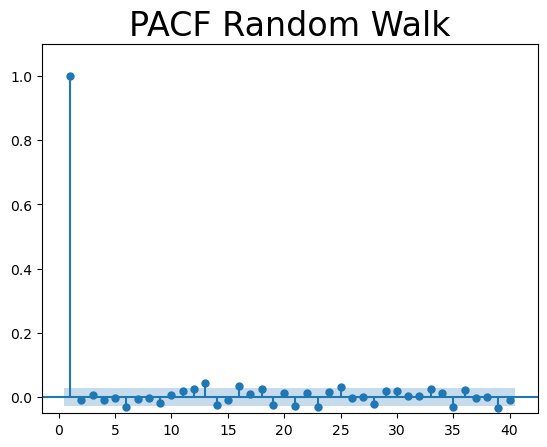

In [65]:
# pacf for Random Walk
# import statsmodels.graphics.tsaplots as sgt

sgt.plot_pacf(
    df['rw'],  # times series to be examined
    lags=40,  # standard optimal number of lags
    zero=False,  # don't include today vs today
    method=('ols')  # ordinary of least squares

)

plt.title("PACF Random Walk", size=24)
plt.ylim(-0.05, 1.1)
plt.show()

### ACF vs PACF

- ACF measures the accumulated effects past lags have on the current value
- PACF measures the direct effect


first lag is significant, no autocorrelation after


## Choosing the Model

- supervised learning - time series
- start with simple model and expand it

Start with:
$x_t = C_0 + \phi_1 x_{t-1} + \epsilon_t$

Move on to :
$x_t = C_0 + \phi_1 x_{t-1} + \phi_2 x_{t-2} + \ldots + \epsilon_t$


1. Coefficients must be significantly different from zero.
   1. If that doesn't hold true the estimators are essentially 0, and don't help us
   2. therefore, don't hold predictive values and they should be omitted
2. Parsimonious (as simple as possible)
   1. Generally a simple model is more favorable than a complex model unless the complex model provides significantly better predictions
   2. statistical test log-likelihood Ratio test
   3. with different degrees of freedom. if same total number of lags, no LLR
      d information criteria


Information Criteria

- Log-Likelihood
  - Higher is better
- AIC + BIC
  - Lower is better

Residuals should resemble white noise.


## Autoregressive model

- [video](https://gale.udemy.com/course/time-series-analysis-in-python/learn/lecture/16275592#announcements)


AR model, past period values, past values

linear model where current period values are a sum of past outcomes multiplied by a numeric factor

$\phi$ pronounced ph-eye

$$

x_t = C + \phi x_{t-1} + \epsilon_t


$$

$x_{t-1}$: The values fo x during the previous period
$\phi$ numeric constant by which we multiply the lagged variable. between $-1 < \phi < 1$

$\epsilon$: Difference between our prediction for 't' and the correct value


How many lags?

- a time series about weather would likely include last 7 days AR(7)

- model using 2 lags

$$
x_t = C + \phi_1 x_{t-1} + \phi_2 x_{t-2} + \epsilon_t
$$


more lags -> more complicated -> more coefficients -> more likely NOT significant

if coefficients are not significant from zero, it makes no sense to include them

use ACF and PACF


the model is called autoregressive as it uses a lagged version of itself (auto) to conduct the regression


## Using ACF and PACF to Determine the appropriate number of lags


Working with the FTSE values


(-0.3, 1.1)

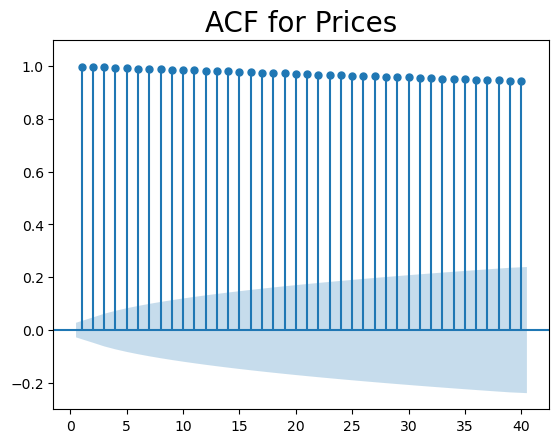

In [66]:
# ACF

sgt.plot_acf(
    df['market_value'],
    zero=False,
    lags=40,
)

plt.title("ACF for Prices", size=20)
plt.ylim(-0.3, 1.1)

- the effects barely deteriorate over time
- the two time-series are similar in the way that they behave and the way past values affect the present ones

parsimonious models are preferred
too many, and it's over-fit and the model will not do well on unseen data.

ACF includes direct and indirect effects.


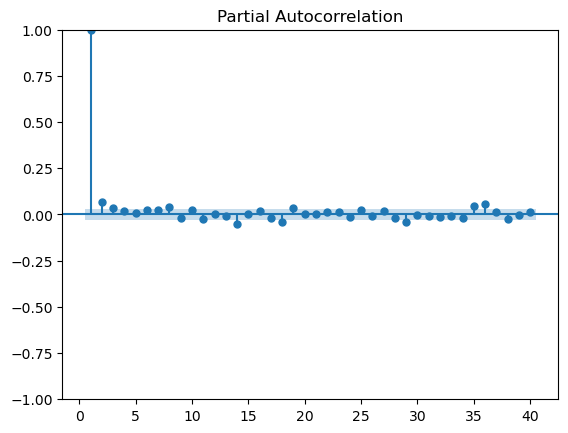

In [67]:
# Pacf

sgt.plot_pacf(
    df['market_value'],
    lags=40,
    alpha=0.05,
    zero=False,
    method=('ols')
)

plt.show()

only want to include lags that have direct affect on current value


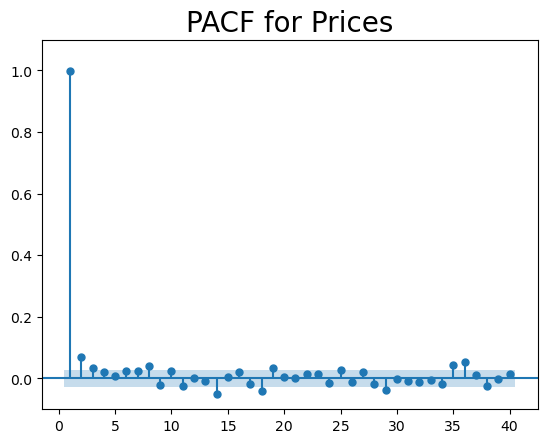

In [68]:
# PACF
sgt.plot_pacf(
    df['market_value'],
    lags=40,
    alpha=0.05,
    zero=False,
    method=('ols'))

plt.title("PACF for Prices", size=20)
plt.ylim(-0.1, 1.1)
plt.show()

- coefficients of different size (not all between 0.9 and 1)
- Coefficients that are negative
- Coefficients that are not significant

Values very close to 0

- impact on the model is minimal, so not relevant to us
- our model must include less than 25 lags in this case.

since data is business days, 22 business days in the month. anticipate some cyclical changes every month

Values a month ago negatively affect the values today.

We should not overanalyze their contribution as they are overshadowed by more recently data


## The AR(1) Model

simple AR(1) model


```text
NotImplementedError:
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

```

In the order parameter, p denotes the autoregressive order, d denotes the differencing order (which is 0 for ARMA models), and q denotes the moving average order. So, (1, 0, 0) indicates an ARMA(1, 0) model.


In [69]:
# from statsmodels.tsa.arima.model import ARIMA

model_ar = ARIMA(
    df['market_value'],
    # 1 past values, 0 not taking residual values into consideration
    # leaving middle value as 0
    order=(1, 0, 0)
)

In [70]:
results_ar = model_ar.fit()

In [71]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -20097.439
Date:                Sat, 17 Feb 2024   AIC                          40200.879
Time:                        09:24:33   BIC                          40220.443
Sample:                    01-07-1994   HQIC                         40207.734
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1091.6133    165.184      6.608      0.000     767.859    1415.368
ar.L1          0.9992      0.001   1695.378      0.000       0.998       1.000
sigma2       175.2480      1.771     98.978      0.000     171.778     178.718
===================================================================================
Ljung-Box (L1) (Q):                  24.60   Jarque-Bera (JB):              7473.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$\delta$ : lowercase delta
